# Analyzing
To get a better idea of the structure of the csv files, some methods for analyzing and visualizing can be found here.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import os
import warnings
# Root CSV files directory
dirname = "./data/absolute/3D/"

### Load

In [2]:
listfile = os.listdir(dirname)
listfile= sorted(listfile, key=str.casefold) 
data = []
for wordname in listfile:
    if wordname == ".DS_Store":
        continue
    for csv in os.listdir(dirname + wordname):
        filepath = os.path.join(dirname, wordname, csv)
        content = pd.read_csv(filepath, sep=';')
        data.append((wordname, content))

## Frame count distribution per word

In [3]:
row_lengths = {}
for (word, content) in data:
    row_lengths[word] = []
for (word, content) in data:
    row_lengths[word].append(content.shape[0])
print(row_lengths)

{'Computer': [40, 47, 41, 28, 27, 43, 53, 77, 43, 36, 43, 37, 36, 60, 64, 49, 34, 71, 45, 60, 45, 47, 39, 33, 65, 40, 31, 35, 73, 39, 39, 37, 61, 37, 67, 48, 36, 31, 49, 34, 85, 40, 59, 49, 31, 67, 49, 75, 38, 45, 41, 40, 66, 49, 57, 69, 84, 45, 56, 48, 47, 35, 46, 29, 41, 44, 49, 46, 43, 69, 35, 39, 28, 31, 46, 38, 36, 69, 28, 63, 39, 33, 33, 59, 47, 56, 50, 42, 55, 48, 34, 66, 84, 49, 48, 48, 47, 55, 66, 74, 45, 63, 29, 39, 45, 30, 65, 37, 44, 31, 33], 'Deutschland': [64, 72, 57, 47, 38, 44, 48, 51, 52, 49, 36, 50, 33, 50, 51, 63, 44, 58, 69, 52, 45, 16, 42, 24, 39, 47, 41, 69, 47, 60, 45, 45, 38, 34, 37, 48, 65, 37, 78, 34, 22, 57, 50, 41, 44, 37, 48, 14, 80, 32, 71, 81, 80, 72, 75, 59, 82, 46, 45, 71, 53, 43, 40, 30, 81, 36, 43, 33, 45, 44, 46, 57, 38, 39, 45, 19, 48, 54, 55, 60, 50, 47, 67, 34, 49, 61, 40, 33, 56, 66, 26, 48, 46, 51, 56, 41, 75, 43, 59, 49, 57, 62, 19, 38, 47, 26, 64, 35, 81, 58, 45, 42, 101, 16, 57], 'du': [60, 46, 34, 35, 55, 43, 27, 42, 59, 29, 41, 37, 30, 48, 

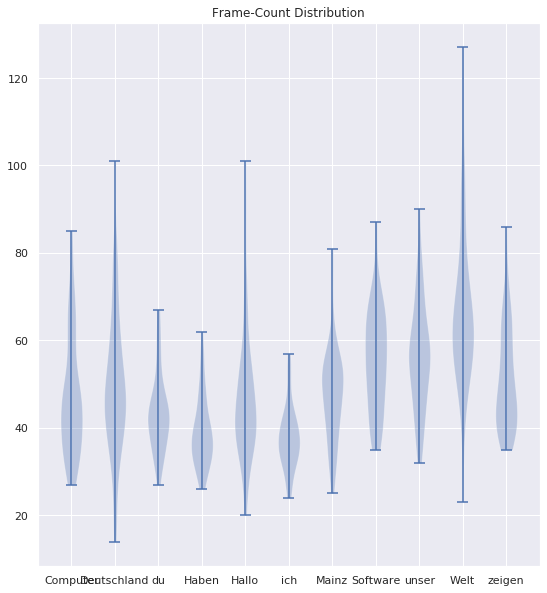

In [4]:
all_data = row_lengths.values()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9,10))

# plot violin plot
axs.violinplot(all_data)
axs.set_title('Frame-Count Distribution')
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=row_lengths.keys())
plt.show()

In [46]:
sign = np.array(data[20][1])
np.nan_to_num(sign, copy=False)
rows = []
for row in sign:
    x, y = row[::2], row[1::2]
    rows.append((x,y))


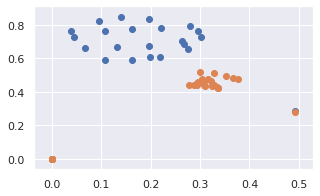

In [47]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = ax.scatter(rows[1][0], rows[1][1])
def animate(i):
    ax.scatter(rows[i][0], rows[i][1])
anim = FuncAnimation(
fig, animate, interval=12, frames=len(rows)-1)